In [3]:
# import library
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [4]:
# setting up
MY_URL = "https://www.worldometers.info/coronavirus"
page = requests.get(MY_URL)
soup = BeautifulSoup(page.text, 'html5lib')

In [5]:
soup.find_all('h1')

[<h1>Coronavirus Cases:</h1>, <h1>Deaths:</h1>, <h1>Recovered:</h1>]

In [6]:
# find table header in soup
table_header = soup.select('#main_table_countries_today thead tr')

In [7]:
table_header

[<tr>
 <th width="1%">#</th>
 <th width="100">Country,<br/>Other</th>
 <th width="20">Total<br/>Cases</th>
 <th width="30">New<br/>Cases</th>
 <th width="30">Total<br/>Deaths</th>
 <th width="30">New<br/>Deaths</th>
 <th width="30">Total<br/>Recovered</th>
 <th width="30">New<br/>Recovered</th>
 <th width="30">Active<br/>Cases</th>
 <th width="30">Serious,<br/>Critical</th>
 <th width="30">Tot Cases/<br/>1M pop</th>
 <th width="30">Deaths/<br/>1M pop</th>
 <th width="30">Total<br/>Tests</th>
 <th width="30">Tests/<br/>
 <nobr>1M pop</nobr>
 </th>
 <th width="30">Population</th>
 <th style="display:none" width="30">Continent</th>
 <th width="30">1 Case<br/>every X ppl</th><th width="30">1 Death<br/>every X ppl</th><th width="30">1 Test<br/>every X ppl</th>
 <th width="30">New Cases/1M pop</th>
 <th width="30">New Deaths/1M pop</th>
 <th width="30">Active Cases/1M pop</th>
 </tr>]

In [8]:
header = [th.text.strip() for th in table_header[0]('th')]

In [9]:
header

['#',
 'Country,Other',
 'TotalCases',
 'NewCases',
 'TotalDeaths',
 'NewDeaths',
 'TotalRecovered',
 'NewRecovered',
 'ActiveCases',
 'Serious,Critical',
 'Tot\xa0Cases/1M pop',
 'Deaths/1M pop',
 'TotalTests',
 'Tests/\n1M pop',
 'Population',
 'Continent',
 '1 Caseevery X ppl',
 '1 Deathevery X ppl',
 '1 Testevery X ppl',
 'New Cases/1M pop',
 'New Deaths/1M pop',
 'Active Cases/1M pop']

In [10]:
# find table header in soup
table_rows = soup.select('#main_table_countries_today tbody tr')

In [11]:
rows_list = []
for tr in table_rows:
    row = [td.text.strip() for td in tr('td')]
    rows_list.append(row)

print(rows_list[:3])

[['', 'North America', '38,258,534', '+5,597', '860,891', '+571', '29,946,256', '+3,404', '7,451,387', '17,487', '', '', '', '', '', 'North America', '', '', '', '', '', ''], ['', 'Asia', '39,064,721', '+69,829', '516,562', '+1,044', '33,427,914', '+56,883', '5,120,245', '32,444', '', '', '', '', '', 'Asia', '', '', '', '', '', ''], ['', 'South America', '24,767,116', '', '668,553', '', '22,393,424', '', '1,705,139', '27,857', '', '', '', '', '', 'South America', '', '', '', '', '', '']]


In [12]:
# create a new dataframe
df = pd.DataFrame(rows_list, columns = header)
df.head()

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,North America,"38,258,534","+5,597","860,891",+571,"29,946,256","+3,404","7,451,387","17,487",,,,,,North America,,,,,,
1,,Asia,"39,064,721","+69,829","516,562","+1,044","33,427,914","+56,883","5,120,245","32,444",,,,,,Asia,,,,,,
2,,South America,"24,767,116",,"668,553",,"22,393,424",,"1,705,139","27,857",,,,,,South America,,,,,,
3,,Europe,"44,497,685","+43,680","1,013,021","+1,638","39,263,623","+79,869","4,221,041","30,172",,,,,,Europe,,,,,,
4,,Africa,"4,588,156",+368,"121,854",+6,"4,112,663",+635,"353,639","3,742",,,,,,Africa,,,,,,


In [13]:
df[df["Country,Other"] == "Thailand"]

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
109,102,Thailand,"65,153","+1,583",203,+15,"36,254",+860,"28,696",871,931,3,"8,124,896","116,161","69,944,830",Asia,"1,074","344,556",9,23,0.2,410


In [14]:
df.query('TotalCases == "30,869"')

,#,"Country,Other",TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/\n1M pop,Population,Continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop


In [15]:
df.columns = [
    'no',
    'country',
    'totalcases',
    'newcases',
    'totaldeaths',
    'newdeaths',
    'totalrecovered',
    'newrecovered',
    'activecases',
    'serious_critical',
    'total_case_1m_pop',
    'total_deaths_1m_pop',
    'total_tests',
    'test_1m_pop',
    'population',
    'continent',
    '1 Caseevery X ppl',
    '1 Deathevery X ppl',
    '1 Testevery X ppl',
    'New Cases/1M pop',
    'New Deaths/1M pop',
    'Active Cases/1M pop'
];

In [16]:
df.query("country == 'Thailand'")

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
109,102,Thailand,"65,153","+1,583",203,+15,"36,254",+860,"28,696",871,931,3,"8,124,896","116,161","69,944,830",Asia,"1,074","344,556",9,23,0.2,410


In [17]:
df['totalcases'] = df['totalcases'].str.replace(',', '').astype('int')
df.head()

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,North America,38258534,"+5,597","860,891",+571,"29,946,256","+3,404","7,451,387","17,487",,,,,,North America,,,,,,
1,,Asia,39064721,"+69,829","516,562","+1,044","33,427,914","+56,883","5,120,245","32,444",,,,,,Asia,,,,,,
2,,South America,24767116,,"668,553",,"22,393,424",,"1,705,139","27,857",,,,,,South America,,,,,,
3,,Europe,44497685,"+43,680","1,013,021","+1,638","39,263,623","+79,869","4,221,041","30,172",,,,,,Europe,,,,,,
4,,Africa,4588156,+368,"121,854",+6,"4,112,663",+635,"353,639","3,742",,,,,,Africa,,,,,,


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   no                   238 non-null    object
 1   country              238 non-null    object
 2   totalcases           238 non-null    int64 
 3   newcases             238 non-null    object
 4   totaldeaths          238 non-null    object
 5   newdeaths            238 non-null    object
 6   totalrecovered       238 non-null    object
 7   newrecovered         238 non-null    object
 8   activecases          238 non-null    object
 9   serious_critical     238 non-null    object
 10  total_case_1m_pop    238 non-null    object
 11  total_deaths_1m_pop  238 non-null    object
 12  total_tests          238 non-null    object
 13  test_1m_pop          238 non-null    object
 14  population           238 non-null    object
 15  continent            238 non-null    object
 16  1 Caseev

# **Line Notify**

In [19]:
# get first values
Country = df.query("country == 'Thailand'")['country'].values[0]
Totalcases = df.query("country == 'Thailand'")['totalcases'].values[0]

In [20]:
line_token = "111gScuWIyAUhS6lyYKuvCYRm83FzipEnbrh5GEKAO3"

In [21]:
def line_notify(message, token):
    url = "https://notify-api.line.me/api/notify"
    data = ({'message': message})
    LINE_HEADERS = {"Authorization": "Bearer " + token}
    session = requests.Session()
    response = session.post(url, headers=LINE_HEADERS, data = data)
    return response

In [22]:
response = line_notify('\nผู้ติดเชื้อ Covid ประเทศ: ' + Country + '\nจำนวน: ' + str(Totalcases), line_token)

In [23]:
df.head()

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
0,,North America,38258534,"+5,597","860,891",+571,"29,946,256","+3,404","7,451,387","17,487",,,,,,North America,,,,,,
1,,Asia,39064721,"+69,829","516,562","+1,044","33,427,914","+56,883","5,120,245","32,444",,,,,,Asia,,,,,,
2,,South America,24767116,,"668,553",,"22,393,424",,"1,705,139","27,857",,,,,,South America,,,,,,
3,,Europe,44497685,"+43,680","1,013,021","+1,638","39,263,623","+79,869","4,221,041","30,172",,,,,,Europe,,,,,,
4,,Africa,4588156,+368,"121,854",+6,"4,112,663",+635,"353,639","3,742",,,,,,Africa,,,,,,


In [72]:
df_singapore=df.query("country == 'Singapore'")

In [73]:
df_singapore

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
110,103,Singapore,61145,+24,30,,"60,718",,397,,"10,384",5,"9,536,636","1,619,583","5,888,327",Asia,96,"196,278",1,4,,67


In [88]:
df_indonesia=df.query("country == 'Indonesia'")

In [90]:
df_assean=df.query("country == 'Indonesia''Thai'Brunei''Cambodia'Laos''Malaysia''Myanmar''Philippines''Singapore''Vietnam'")

SyntaxError: ignored

In [91]:
df.query("country == 'Indonesia'")

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
25,18,Indonesia,1668368,"+5,500","45,521",+187,"1,522,634","+5,202","100,213",,"6,047",165,"14,563,216","52,783","275,909,168",Asia,165,"6,061",19,20,0.7,363


In [92]:
df.query("country == 'Thai'")

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop


In [93]:
df.query("country =='Cambodia'")

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
149,142,Cambodia,12641,,91,,"4,986",,"7,564",,748,5,"878,976","51,981","16,909,578",Asia,"1,338","185,820",19,,,447


In [94]:
df.query("country == 'Laos'")

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
201,194,Laos,757,+85,,,51,+1,706,,103,,"171,231","23,257","7,362,511",Asia,"9,726",,43,12,,96


In [95]:
df.query("country == 'Malaysia'")

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
50,43,Malaysia,408713,"+3,788","1,506",+14,"377,980","+2,640","29,227",328,"12,496",46,"9,404,236","287,523","32,707,748",Asia,80,"21,718",3,116,0.4,894


In [96]:
df.query("country == 'Myanmar'")

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
89,82,Myanmar,142800,,"3,209",,"131,958",,"7,633",,"2,610",59,"2,574,773","47,061","54,711,048",Asia,383,"17,049",21,,,140


In [97]:
df.query("country == 'Philippines'")

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
33,26,Philippines,1037460,"+8,748","17,234",+89,"946,318","+4,143","73,908",750,"9,365",156,"11,731,301","105,895","110,782,828",Asia,107,"6,428",9,79,0.8,667


In [98]:
df.query("country == 'Singapore'")

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
110,103,Singapore,61145,+24,30,,"60,718",,397,,"10,384",5,"9,536,636","1,619,583","5,888,327",Asia,96,"196,278",1,4,,67


In [99]:
df.query("country == 'Vietnam'")

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
183,176,Vietnam,2913,+3,35,,"2,516",,362,,30,0.4,"2,598,753","26,501","98,061,338",Asia,"33,663","2,801,753",38,0.03,,4


In [89]:
df_indonesia

,no,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases,serious_critical,total_case_1m_pop,total_deaths_1m_pop,total_tests,test_1m_pop,population,continent,1 Caseevery X ppl,1 Deathevery X ppl,1 Testevery X ppl,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop
25,18,Indonesia,1668368,"+5,500","45,521",+187,"1,522,634","+5,202","100,213",,"6,047",165,"14,563,216","52,783","275,909,168",Asia,165,"6,061",19,20,0.7,363


In [75]:
df_singapore.columns

Index(['no', 'country', 'totalcases', 'newcases', 'totaldeaths', 'newdeaths',
       'totalrecovered', 'newrecovered', 'activecases', 'serious_critical',
       'total_case_1m_pop', 'total_deaths_1m_pop', 'total_tests',
       'test_1m_pop', 'population', 'continent', '1 Caseevery X ppl',
       '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop',
       'New Deaths/1M pop', 'Active Cases/1M pop'],
      dtype='object')

In [49]:
df.query("country == 'Singapore'").describe()

,totalcases
count,1.0
mean,61145.0
std,NaN
min,61145.0
25%,61145.0
50%,61145.0
75%,61145.0
max,61145.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 1080x288 with 0 Axes>

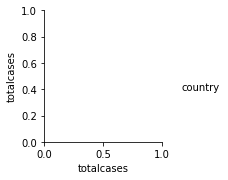

In [78]:
plt.figure(figsize=(15,4))
sns.pairplot(data=df_singapore[['country',
                                'totalcases',
                                'newcases',
                                'totaldeaths',
                                'newdeaths',
                                'totalrecovered',
                                'newrecovered',
                                'activecases']], hue="country")

In [60]:
df[["country", "totalrecovered"]].sample(5)

,country,totalrecovered
39,Hungary,"510,379"
237,Total:,"129,189,730"
120,Mongolia,"19,642"
99,Kyrgyzstan,"89,191"
96,Sri Lanka,"95,445"


In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
%matpltlib inline

UsageError: Line magic function `%matpltlib` not found.


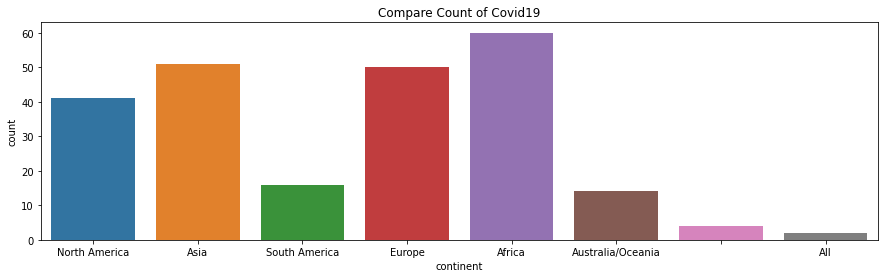

In [62]:
plt.figure(figsize=(15,4))
plt.title("Compare Count of Covid19")
sns.countplot(x="continent", data=df)

In [38]:
df.columns

Index(['no', 'country', 'totalcases', 'newcases', 'totaldeaths', 'newdeaths',
       'totalrecovered', 'newrecovered', 'activecases', 'serious_critical',
       'total_case_1m_pop', 'total_deaths_1m_pop', 'total_tests',
       'test_1m_pop', 'population', 'continent', '1 Caseevery X ppl',
       '1 Deathevery X ppl', '1 Testevery X ppl', 'New Cases/1M pop',
       'New Deaths/1M pop', 'Active Cases/1M pop'],
      dtype='object')

In [67]:
df_new=df[['country', 'totalcases', 'newcases', 'totaldeaths', 'newdeaths',
       'totalrecovered', 'newrecovered', 'activecases']].sample(10)

In [81]:
df_new

,country,totalcases,newcases,totaldeaths,newdeaths,totalrecovered,newrecovered,activecases
20,Poland,2792142,"+6,796","67,502",+429,"2,496,810","+13,030","227,830"
57,Croatia,332183,"+2,007","7,081",+41,"310,595","+2,337","14,507"
121,Malawi,34062,,"1,148",,"32,023",,891
9,India,18762976,"+7,992","208,330",+17,"15,384,418","+10,653","3,170,228"
211,New Caledonia,124,,,,58,,66
85,Bahrain,175752,,639,,"164,904",,"10,209"
179,Comoros,3834,,146,,"3,674",,14
174,Gibraltar,4283,,94,,"4,185",,4
55,Belarus,357233,,"2,532",,"347,554",,"7,147"
192,St. Vincent Grenadines,1855,,11,,"1,712",,132


In [82]:
df_new.columns

Index(['country', 'totalcases', 'newcases', 'totaldeaths', 'newdeaths',
       'totalrecovered', 'newrecovered', 'activecases'],
      dtype='object')

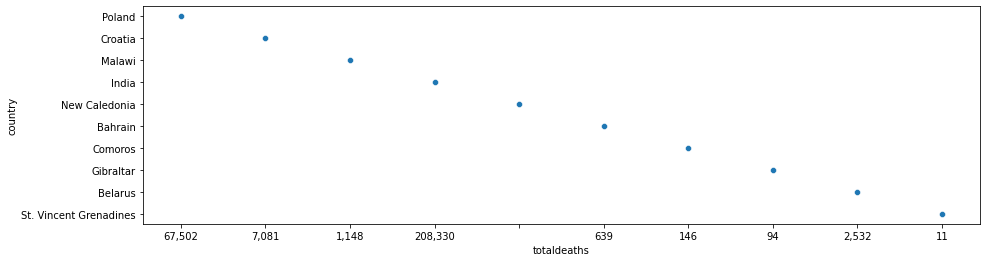

In [83]:
plt.figure(figsize=(15,4))
sns.scatterplot(x="totaldeaths", y="country", data=df_new, )

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning

<Figure size 1080x288 with 0 Axes>

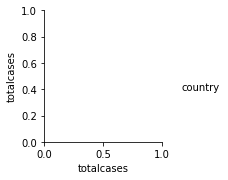

In [84]:
plt.figure(figsize=(15,4))
sns.pairplot(data=df_new[['country',
                                'totalcases',
                                'newcases',
                                'totaldeaths',]], hue="country")